In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('C:/Users/saide/Desktop/study/python_upskill/ml_algorithms/house_price.csv')

In [3]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [4]:
df = df.drop_duplicates()
df = df.fillna(df.median(numeric_only=True))
df = df.select_dtypes(include=[np.number])

In [5]:
target_col = "House_Price"  
X = df.drop(columns=[target_col])
y = df[target_col]

In [6]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
class RegressionTreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class RegressionTreeScratch:
    def __init__(self, max_depth=3, min_samples_split=10):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float).reshape(-1)
        self.root = self._build_tree(X, y, depth=0)
        return self

    def predict(self, X):
        X = np.array(X, dtype=float)
        return np.array([self._traverse_tree(x, self.root) for x in X])
    def _build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        if (depth >= self.max_depth or
            n_samples < self.min_samples_split or
            np.unique(y).size == 1):
            return RegressionTreeNode(value=float(np.mean(y)))
        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None:
            return RegressionTreeNode(value=float(np.mean(y)))
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        if left_mask.sum() == 0 or right_mask.sum() == 0:
            return RegressionTreeNode(value=float(np.mean(y)))
        left_child = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_child = self._build_tree(X[right_mask], y[right_mask], depth + 1)
        return RegressionTreeNode(
            feature=best_feature,
            threshold=best_threshold,
            left=left_child,
            right=right_child
        )

    def _best_split(self, X, y):
        n_samples, n_features = X.shape
        best_mse = float("inf")
        best_feature = None
        best_threshold = None
        if np.var(y) == 0:
            return None, None
        for feature in range(n_features):
            x_col = X[:, feature]
            sort_idx = np.argsort(x_col)
            x_sorted = x_col[sort_idx]
            y_sorted = y[sort_idx]
            if np.unique(x_sorted).size == 1:
                continue
            y_prefix_sum = np.cumsum(y_sorted)
            y_prefix_sq_sum = np.cumsum(y_sorted ** 2)
            total_sum = y_prefix_sum[-1]
            total_sq_sum = y_prefix_sq_sum[-1]
            for i in range(1, n_samples):
                if x_sorted[i] == x_sorted[i - 1]:
                    continue
                left_n = i
                right_n = n_samples - i
                left_sum = y_prefix_sum[i - 1]
                left_sq_sum = y_prefix_sq_sum[i - 1]
                right_sum = total_sum - left_sum
                right_sq_sum = total_sq_sum - left_sq_sum
                left_var = (left_sq_sum / left_n) - (left_sum / left_n) ** 2
                right_var = (right_sq_sum / right_n) - (right_sum / right_n) ** 2
                weighted_mse = (left_n / n_samples) * left_var + (right_n / n_samples) * right_var
                if weighted_mse < best_mse:
                    best_mse = weighted_mse
                    best_feature = feature
                    best_threshold = (x_sorted[i - 1] + x_sorted[i]) / 2.0
        return best_feature, best_threshold

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [10]:
class GradientBoostingRegressorScratch:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, min_samples_split=10):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.init_value = None
        self.trees = []
        self.loss_history = []

    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float).reshape(-1)
        self.init_value = float(np.mean(y))
        y_pred = np.full_like(y, self.init_value, dtype=float)
        self.trees = []
        self.loss_history = []
        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = RegressionTreeScratch(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X, residuals)
            self.trees.append(tree)
            update = tree.predict(X)
            y_pred += self.learning_rate * update
            mse = np.mean((y - y_pred) ** 2)
            self.loss_history.append(mse)
        return self

    def predict(self, X):
        X = np.array(X, dtype=float)
        y_pred = np.full(X.shape[0], self.init_value, dtype=float)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

In [11]:
gbr = GradientBoostingRegressorScratch(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=10
)
gbr.fit(X_train.values, y_train.values)
y_pred_gbr = gbr.predict(X_test.values)

In [12]:
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Gradient Boosting Regression Metrics")
print("MSE :", mse_gbr)
print("RMSE:", rmse_gbr)
print("MAE :", mae_gbr)
print("R2  :", r2_gbr)

Gradient Boosting Regression Metrics
MSE : 230831661.2356066
RMSE: 15193.145205506547
MAE : 12379.444982668525
R2  : 0.9964189302809563


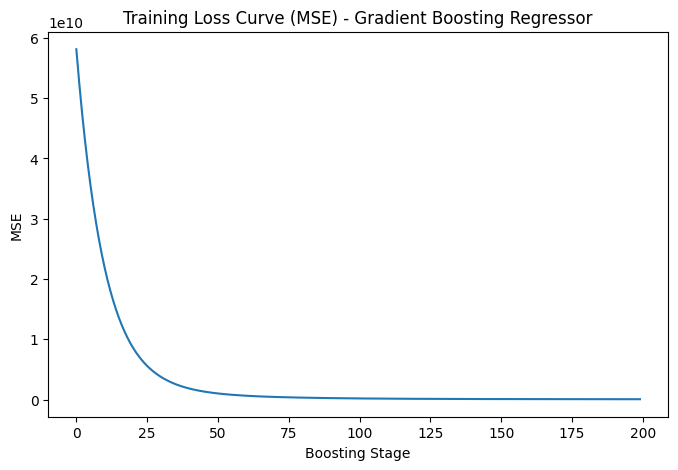

In [13]:
# Loss curve (this IS applicable for boosting)
plt.figure(figsize=(8, 5))
plt.plot(gbr.loss_history)
plt.title("Training Loss Curve (MSE) - Gradient Boosting Regressor")
plt.xlabel("Boosting Stage")
plt.ylabel("MSE")
plt.show()

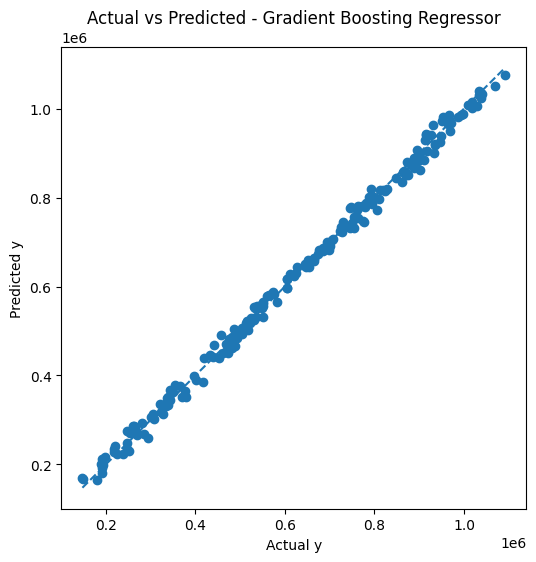

In [14]:
# Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_gbr)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.title("Actual vs Predicted - Gradient Boosting Regressor")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.show()

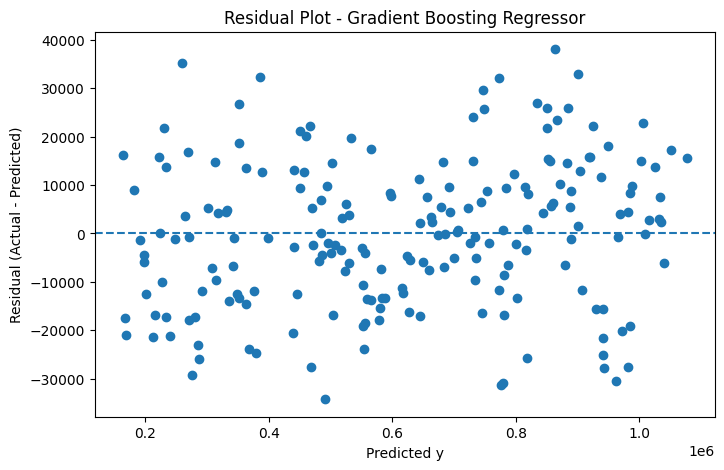

In [15]:
# Residual plot
residuals_gbr = y_test.values - y_pred_gbr
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_gbr, residuals_gbr)
plt.axhline(0, linestyle='--')
plt.title("Residual Plot - Gradient Boosting Regressor")
plt.xlabel("Predicted y")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()

In [16]:
gbr_results = pd.DataFrame([{
    "Model": "Gradient Boosting Regressor (Scratch)",
    "MSE": mse_gbr,
    "RMSE": rmse_gbr,
    "MAE": mae_gbr,
    "R2": r2_gbr,
    "Estimators": 200,
    "Learning Rate": 0.05,
    "Max Depth": 3
}])

gbr_results

,Model,MSE,RMSE,MAE,R2,Estimators,Learning Rate,Max Depth
0,Gradient Boosting Regressor (Scratch),2.308317e+08,15193.145206,12379.444983,0.996419,200,0.05,3
